# Air Quality Missing Data Analysis

## Transforming

In [ ]:
df = pd.read_csv('airQuality.csv')
df['Date'] = pd.to_datetime(dict(year=1973, month=df.Month, day=df.Day))
df = df[['Date', 'Ozone', 'Solar.R', 'Wind', 'Temp']]

In [ ]:
df.head()

,Date,Ozone,Solar.R,Wind,Temp
0,1973-05-01,41.0,190.0,7.4,67
1,1973-05-02,36.0,118.0,8.0,72
2,1973-05-03,12.0,149.0,12.6,74
3,1973-05-04,18.0,313.0,11.5,62
4,1973-05-05,NaN,NaN,14.3,56


In [ ]:
df.to_csv('air-quality.csv', index=False)

## Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
df_air = pd.read_csv('air-quality.csv', parse_dates=['Date'], index_col='Date')
df_air.head()

,Ozone,Solar.R,Wind,Temp
Date,,,,
1973-05-01,41.0,190.0,7.4,67
1973-05-02,36.0,118.0,8.0,72
1973-05-03,12.0,149.0,12.6,74
1973-05-04,18.0,313.0,11.5,62
1973-05-05,NaN,NaN,14.3,56


In [ ]:
nullity_df = df_air.isnull().sum().to_frame(name='Missing Values')
nullity_df['% Missing'] = (df_air.isnull().mean() * 100).round(2)
# nullity_df['% Missing'] = ((df_air.isnull().sum() / df_air.shape[0]) * 100).round(2)
nullity_df

,Missing Values,% Missing
Ozone,37,24.18
Solar.R,7,4.58
Wind,0,0.00
Temp,0,0.00


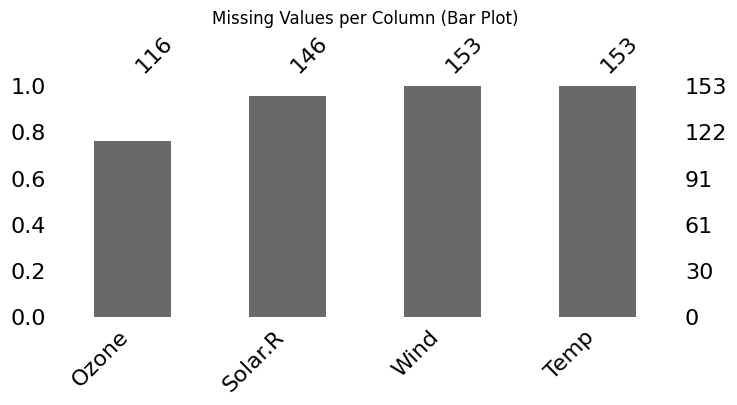

In [ ]:
msno.bar(df_air, figsize=(8, 3))
plt.title("Missing Values per Column (Bar Plot)")
plt.show()

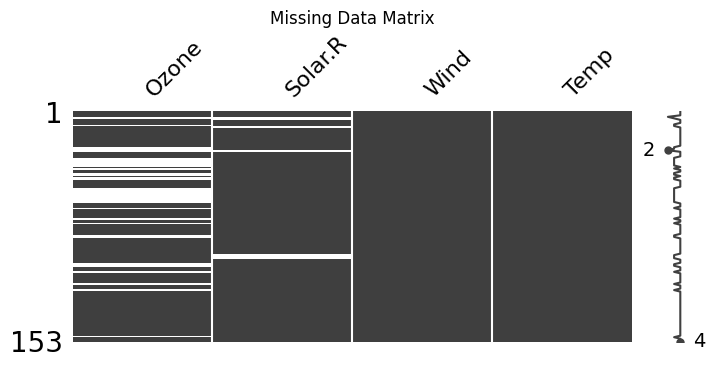

In [ ]:
msno.matrix(df_air, figsize=(8, 3))
plt.title("Missing Data Matrix")
plt.show()

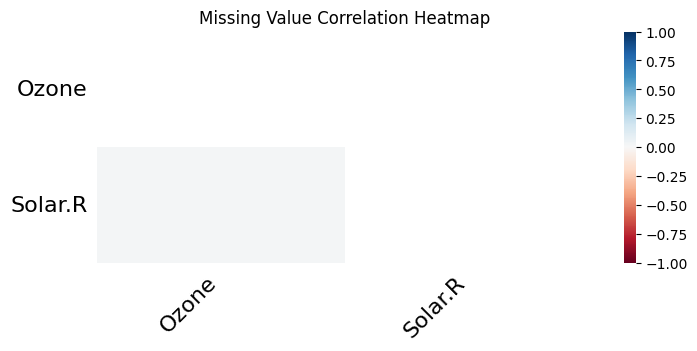

In [ ]:
msno.heatmap(df_air, figsize=(8, 3))
plt.title("Missing Value Correlation Heatmap")
plt.show()

# Feature Engineering

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


The train_test_split() function divides your dataset into two parts: a training set used to train the model, and a test set used to evaluate the model's performance on unseen data. This is a fundamental practice in machine learning to prevent overfitting and to simulate how the model will behave in the real world. Typically, 70–80% of the data is used for training, and the remaining 20–30% is reserved for testing. Importantly, the split should be done before any preprocessing like scaling, to avoid data leakage.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization is a technique to rescale features so they have a mean of 0 and standard deviation of 1. It ensures that each feature contributes equally to the model, especially when they are on different scales (e.g., alcohol percentage vs. magnesium content). StandardScaler computes the z-score for each value:

𝑧
=
(
𝑥
−
𝜇
)
/
𝜎

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Normalization rescales each sample (row) individually so that its L2 norm (Euclidean length) becomes 1. It is different from standardization, which works feature-wise (column-wise). Normalizer is most useful when the direction of the data matters more than its magnitude, such as in cosine similarity-based models or text classification. This is typically applied when features represent frequencies or proportions.

In [ ]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
X_train_norm = normalizer.fit_transform(X_train_scaled)
X_test_norm = normalizer.transform(X_test_scaled)

RandomForestClassifier is an ensemble learning method that builds multiple decision trees and averages their predictions. After fitting the model, it computes feature importances based on how much each feature reduces impurity across all trees. These importances are then used to evaluate the relative value of each feature in making predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

SelectFromModel is a meta-transformer that selects the most important features based on the output of a previously trained model. When used with prefit=True, it assumes the model has already been trained and uses its coefficients or feature importances to decide which features to keep, typically based on a threshold (like mean or median importance).

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf, threshold="median")
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

The get_support() method returns a Boolean array where each value corresponds to whether a feature was selected (True) or not (False). This array acts as a mask that you can use to filter your feature set and retain only those deemed important by the model.

features_bool is the Boolean mask array returned by get_support(). It has the same length as the number of original features and contains True for selected features and False for those to be dropped. It allows you to quickly filter or inspect selected columns programmatically.

In [ ]:
features_bool = selector.get_support()
selected_features = X.columns[features_bool]

Using features_bool as a mask on your original column names (e.g., X.columns[features_bool]) gives you the names of the selected features. These are the features that the model found most informative and that you’ll keep for downstream modeling tasks. This step improves efficiency and may enhance model performance by removing irrelevant or redundant features.

In [ ]:
X_train[selected_features].head()

,alcohol,magnesium,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,14.34,98.0,1.31,13.00,0.57,1.96,660.0
137,12.53,96.0,0.60,5.00,0.82,1.69,515.0
98,12.37,88.0,3.75,4.50,1.04,2.77,660.0
159,13.48,89.0,1.10,11.75,0.57,1.78,620.0
38,13.07,98.0,2.64,3.70,1.18,2.69,1020.0


# Outlier Analysis

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


A histogram is a visual representation of the distribution of a numerical feature by grouping data into intervals (bins) and counting how many values fall into each bin. Choosing the right number of bins is crucial — too few bins can oversimplify the data and hide patterns, while too many can make the plot noisy and misleading. By using an adaptive approach like the square root of the number of observations (√n), we ensure a balanced bin count that adjusts to dataset size, making the distribution easier to interpret. This adaptiveness enhances outlier analysis by making extreme values (that fall far outside the main bins) visually stand out as isolated bars or sparse areas, helping identify unusual data points quickly and intuitively.

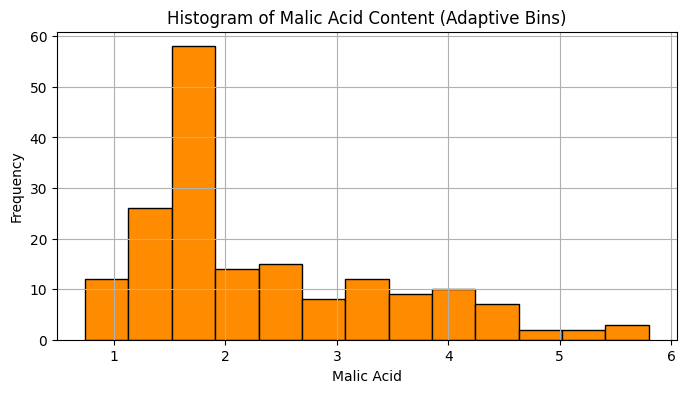

In [ ]:
import matplotlib.pyplot as plt

macid = df['malic_acid']
n_bins = int(np.sqrt(len(macid)))

plt.figure(figsize=(8, 4))
plt.hist(macid, bins=n_bins, color='darkorange', edgecolor='black')
plt.title('Histogram of Malic Acid Content (Adaptive Bins)')
plt.xlabel('Malic Acid')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

A scatter plot with sample index on the x-axis and feature values (like alcohol or sales) on the y-axis shows how values are distributed across observations. Each dot represents one sample. This plot is especially useful for spotting isolated spikes or dips — points that deviate clearly from the general trend — which may indicate potential outliers. The advantage of this method is that it shows not just the value but where in the dataset the outlier occurs (by index), helping you trace it back to raw data or groupings (e.g., class labels). The use of transparency (alpha=0.5) also helps manage visual clutter when there are overlapping points.

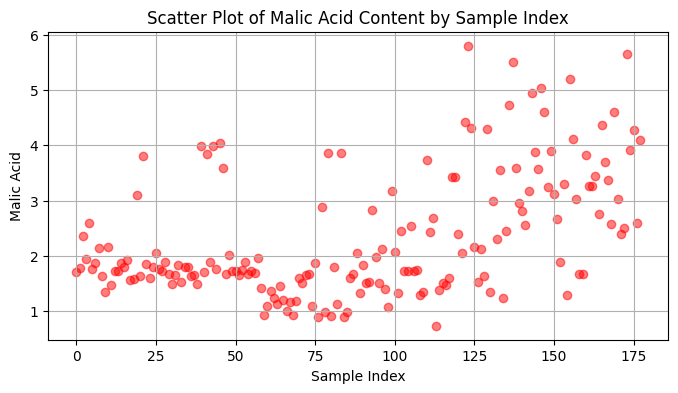

In [ ]:
integers = range(len(macid))

plt.figure(figsize=(8, 4))
plt.scatter(integers, macid, c='red', alpha=0.5)
plt.title('Scatter Plot of Malic Acid Content by Sample Index')
plt.xlabel('Sample Index')
plt.ylabel('Malic Acid')
plt.grid(True)
plt.show()

A boxplot is a visual representation of the distribution of a dataset. It displays the minimum, first quartile (Q1), median, third quartile (Q3), and maximum values. The "box" shows the interquartile range (IQR), while "whiskers" extend to capture most of the data. Any points beyond the whiskers are considered outliers and are plotted as individual dots. Boxplots are useful for quickly identifying skewness, spread, and potential outliers in the data, especially in exploratory data analysis.

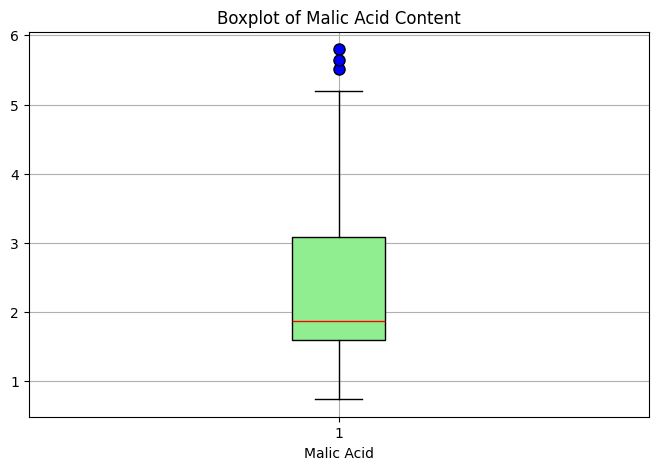

In [ ]:
import matplotlib.pyplot as plt

# Plot boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(macid, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markerfacecolor='blue', markersize=8))

plt.title('Boxplot of Malic Acid Content')
plt.xlabel('Malic Acid')
plt.grid(True)
plt.show()

The Interquartile Range (IQR) method is a statistical technique to detect outliers based on data spread. It computes the range between the 1st quartile (Q1) and 3rd quartile (Q3), where:

IQR = Q3 - Q1

Outliers are defined as any data points that fall below:

Q1 - 1.5 * IQR

or above:

Q3 + 1.5 * IQR

This method is non-parametric (makes no assumption about distribution) and works well for symmetric and moderately skewed distributions.

In [ ]:
# IQR method
Q1 = macid.quantile(0.25)
Q3 = macid.quantile(0.75)
IQR = Q3 - Q1

# Outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = macid[(macid < lower_bound) | (macid > upper_bound)]

print(f"Number of outliers in Malic Acid: {len(outliers)}")
print(outliers)


Number of outliers in Malic Acid: 3
123    5.80
137    5.51
173    5.65
Name: malic_acid, dtype: float64


The Z-score method identifies outliers by measuring how far each data point is from the mean in terms of standard deviations:

𝑍
=
(𝑥
−
𝜇) /
𝜎


A data point with a Z-score greater than a certain threshold (commonly 2.5 or 3) is flagged as an outlier. This method assumes the data is approximately normally distributed. It is simple and effective, but less robust when the data is skewed or contains significant outliers already.



In [ ]:
from scipy.stats import zscore

z_scores = zscore(macid)

# Set threshold (commonly 3 or 2.5)
threshold = 3

# Identify outliers
outliers = macid[np.abs(z_scores) > threshold]

# Print results
print(f"Number of outliers in 'malic_acid' using Z-score > {threshold}: {len(outliers)}")
print(outliers)

Number of outliers in 'malic_acid' using Z-score > 3: 1
123    5.8
Name: malic_acid, dtype: float64


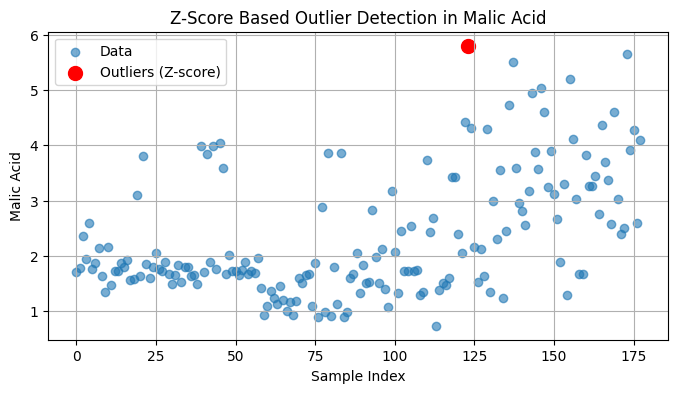

In [ ]:
indices = np.arange(len(macid))

plt.figure(figsize=(8, 4))
plt.scatter(indices, macid, label='Data', alpha=0.6)
plt.scatter(outliers.index, outliers, color='red', label='Outliers (Z-score)', s=100)
plt.title('Z-Score Based Outlier Detection in Malic Acid')
plt.xlabel('Sample Index')
plt.ylabel('Malic Acid')
plt.legend()
plt.grid(True)
plt.show()

The MAD method is a robust alternative to Z-scores that uses the median and median absolute deviation instead of the mean and standard deviation.

Because it relies on medians, it is less affected by extreme values and works well with skewed or heavy-tailed distributions. It’s especially useful when data includes non-normal or non-symmetric patterns, making it a preferred choice in many real-world anomaly detection cases.

In [ ]:
from scipy.stats import median_abs_deviation

# Compute MAD
mad = median_abs_deviation(macid)
median = np.median(macid)

# Calculate Modified Z-Scores
modified_z_scores = 0.6745 * (macid - median) / mad

# Define threshold for modified z-scores (common: > 3.5)
threshold = 3.5
outliers = macid[np.abs(modified_z_scores) > threshold]

# Output results
print(f"Number of outliers in 'malic_acid' using MAD > {threshold}: {len(outliers)}")
print(outliers)

Number of outliers in 'malic_acid' using MAD > 3.5: 9
123    5.80
136    4.72
137    5.51
143    4.95
146    5.04
147    4.61
155    5.19
169    4.60
173    5.65
Name: malic_acid, dtype: float64


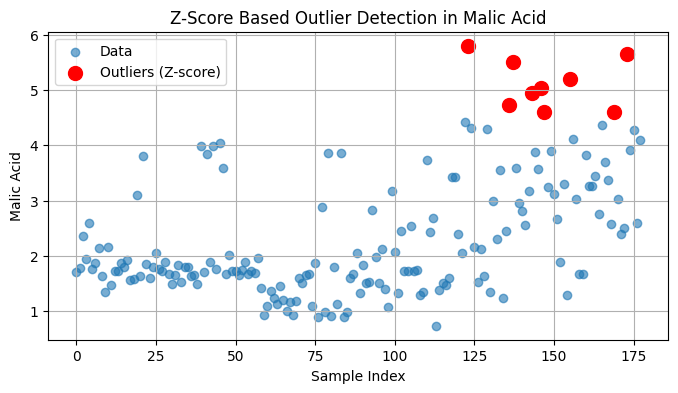

In [ ]:
indices = np.arange(len(macid))

plt.figure(figsize=(8, 4))
plt.scatter(indices, macid, label='Data', alpha=0.6)
plt.scatter(outliers.index, outliers, color='red', label='Outliers (MAD)', s=100)
plt.title('MAD Based Outlier Detection in Malic Acid')
plt.xlabel('Sample Index')
plt.ylabel('Malic Acid')
plt.legend()
plt.grid(True)
plt.show()